# 3. Predictive model using Different Algorithms

In this notebook we finally begin our path for prediction. We have considered logistic regression algothirms for our classification problem.

## 3.1 Prediction

In [1]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# load dataset
df = pd.read_csv("data/smartphone-data.csv",delimiter = ",")

Since the __activity columns is object type__, and our logistic regression would not be able to apprehend it. Therefor we must need to convert this column into numerical for each class, we can use __LabelEncoder__ to do do our job.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)

9538    5
1563    3
475     4
8981    3
4150    5
Name: Activity, dtype: int32

Since we need the feature column separately, we create the dataframe.

In [5]:
# feature column
feature_columns = df.columns[:-1]

Now we __split the data into train and test data sets__. Since we need each class eqaully divided into the trian and test dataset, we consider using __Scikit-learn's StratifiedShuffleSplit__ to maintain the same ratio of predictor classes, since it is like K Fold which can balance the classes.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# get split indices
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_split.split(df[feature_columns], df.Activity))

# create dataframes
X_train = df.loc[train_idx, feature_columns]
y_train = df.loc[train_idx, "Activity"]

X_test = df.loc[test_idx, feature_columns]
y_test = df.loc[test_idx, "Activity"]

In [7]:
# check value count for y train
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [8]:
# check value count for y test
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

##  Logistic Regression

Now we begin our logistic regression to predict our classes. Since we could be overfitting our model we can use both l1 and l2 norms (regularization - lasso, ridge) to check the accuracy for our model. Therefor we'll be using three types of model here
first the vanilla logistic regression without any hyperparameter tuning, secondly with l1 and third with l2 regularization.

In [9]:
from sklearn.linear_model import LogisticRegression

# since there are multiple classes, we have to use one vs all classifier -- solver = liblinear
lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [10]:
from sklearn.linear_model import LogisticRegressionCV

# l1 norm regularisation with lamda selection =10 , cv = 4
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train,y_train)

In [11]:
# l1 norm regularisation with lamda selection =10 , cv = 4
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train,y_train)

In [12]:
# combine all coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for label,model in zip(coeff_labels, coeff_models):
    coeffs = model.coef_
    coeff_label = pd.MultiIndex(levels=[[label], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

In [13]:
# check 10 random sample
coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
438 -0.026657 -0.279934  0.012145 -0.157384 -0.142901 -0.066228  0.000000   
19   0.018511 -0.529262 -0.342816 -0.081396  0.134678 -0.433331  0.000000   
437  0.047059  0.466953 -0.158667  0.163815 -0.108576  0.392797  0.215247   
505  0.105876  0.139917  0.347104 -0.848523  0.281501  0.431145  0.164886   
525 -0.041768  0.033782 -0.243843 -0.117711  0.002087  0.792853  0.000000   
403 -0.027296  0.057664 -0.029316  0.078496  0.115030 -0.264176 -0.036629   
22   0.087942 -0.747104  1.265813  1.232439 -1.393888  1.506603  0.000000   
506  0.130772 -0.408462  0.332398  0.006995 -0.156091 -0.227615  0.088252   
532  0.040457  0.831840 -0.514372 -0.213893  0.512250 -0.044362  0.000000   
526  0.054534 -0.072086  0.082796  0.778917  0.597529 -1.339679  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
438  0.000000  0.000000 -0.259000 -0.144543 -0.155346 -0.037326 -1.270512   
19  -0.594522  0.000000 -0.231356  0.000000 -1.291810  0.037342 -1.839117   
437  0.589773  0.000000  0.000000  0.000000  0.785897  0.077848  2.388314   
505  0.000000  0.000000 -0.771838  0.174451  1.167708  0.190465 -0.054190   
525  0.000000 -0.079369 -0.045470  0.231052  5.552395 -0.078437  0.386488   
403  0.000000  0.000000  0.000000  0.046395 -0.417414 -0.064217 -0.133632   
22  -1.783247  3.413183  3.625327 -3.732268  4.878710  0.252127 -2.821642   
506  0.000000  0.000000  0.011371  0.000000 -0.202589  0.238103 -3.405890   
532  2.153548 -0.286498 -0.100212  0.771933  0.288024  0.064596  2.696246   
526  0.000000  0.018234  1.731159  0.681683 -5.557638  0.088706  0.298705   

                                             
            2         3         4         5  
438  0.531751 -0.601189 -0.380067 -0.223849  
19  -0.570987 -0.268966  0.490371 -1.955086  
437 -1.743023  0.115609 -0.418320  1.809987  
505  1.692420 -2.133302  0.498314  2.096796  
525 -0.387268 -0.570071  0.097207  3.606820  
403 -0.007207 -0.017272  0.334061 -0.607612  
22   3.712974  3.091660 -2.660840  7.174872  
506  2.114340  0.269507 -0.322279 -1.384255  
532 -2.446551 -0.610761  1.316288  0.235516  
526  0.449227  1.739792  0.724852 -5.035697

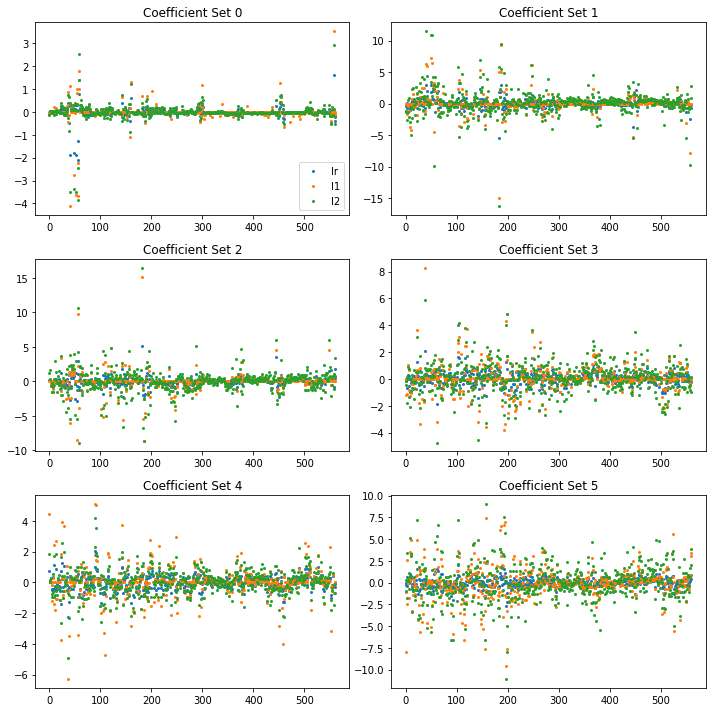

In [14]:
# plot six separate plots for each of the multi-class coefficients.
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [15]:
# Predict and store classes for each model. Store the probablity and class for each model

y_pred = list()
y_prob = list()

for label,model in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(model.predict(X_test), name=label))
    y_prob.append(pd.Series(model.predict_proba(X_test).max(axis=1), name=label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [16]:
# check probablity y 
y_prob.head(10)

,lr,l1,l2
0,0.998939,0.998911,0.999998
1,0.988165,0.999509,0.999477
2,0.987592,0.995451,0.999697
3,0.981381,0.999164,0.999865
4,0.998277,0.999924,0.999997
5,0.981715,0.998483,0.998213
6,0.998815,0.999999,1.000000
7,0.996950,0.999879,0.999990
8,0.999703,0.999999,0.999995
9,0.997391,0.999984,1.000000


## 3.2 Optimization

### Error Metrics and model performace

For each model, we calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [18]:
metrics = list()
conf_mat = dict()

for label in coeff_labels:
    
    precision, recall, fscore, _ = score(y_test, y_pred[label], average='weighted')

    accuracy = accuracy_score(y_test, y_pred[label])

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[label], classes=[0,1,2,3,4,5]), 
              average='weighted')

    conf_mat[label] = confusion_matrix(y_test, y_pred[label])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=label))

metrics = pd.concat(metrics, axis=1)

In [19]:
# check the result
metrics

,lr,l1,l2
precision,0.984144,0.983506,0.984477
recall,0.984142,0.983495,0.984466
fscore,0.984143,0.983492,0.984464
accuracy,0.984142,0.983495,0.984466
auc,0.990384,0.989948,0.990553


__Plot Confusion Matrix for each model__

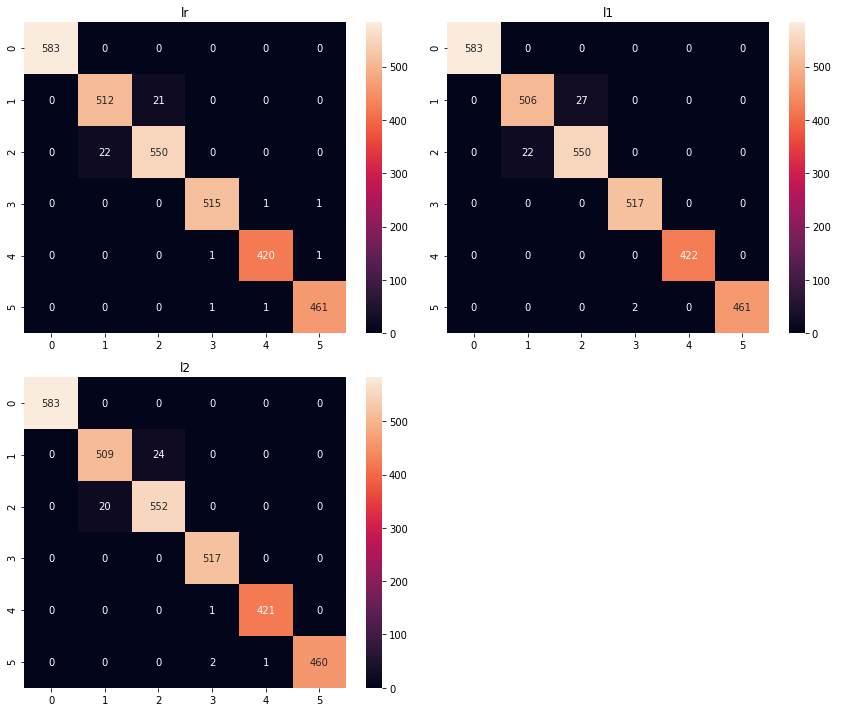

In [20]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,label in zip(axList[:-1], coeff_labels):
    sns.heatmap(conf_mat[label], ax=ax, annot=True, fmt='d');
    ax.set(title=label);
    
plt.tight_layout()

In [21]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Conclusion

Finally we can see from the heatmap for our confusion matrix that almost everything is predicted correctly. Rows denote the ground truth value which means the actual class and the column denoted the predicted class values. We can see for each and every model that few of the predictions are improperly predicted for the classes 1 and 2 where our models get confused and assigns values to each other(wrong class). So class sitting and standing are getting confused with each other.